# Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Load and Preprocess dataset

In [2]:
# Load the dataset using pandas.read_csv

df = pd.read_csv("adult.csv")

In [3]:
# Print first rows the dataset

print(df.head(10)) # printing the first 10 rows of dataframe

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

In [4]:
# replacing missing character with pd.NA
df.replace('?', pd.NA, inplace=True)

# drop rows with missing values
df.dropna(inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Visualize dataset

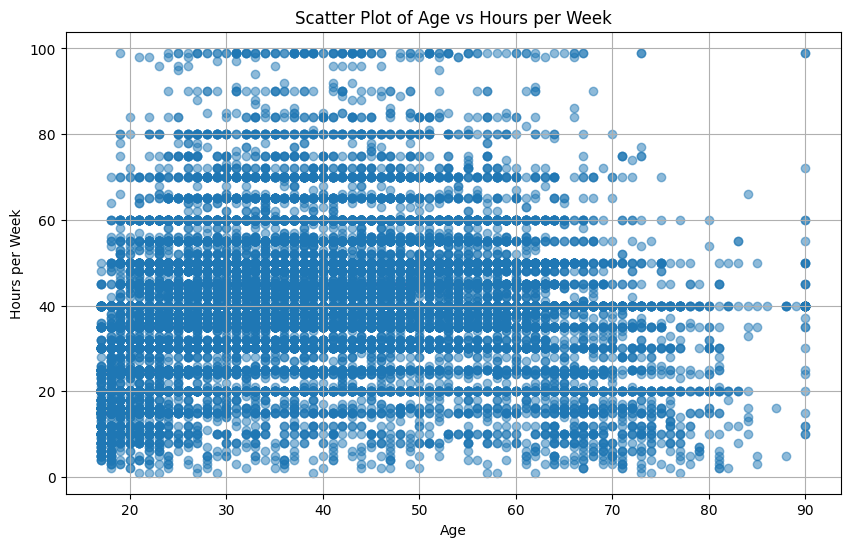

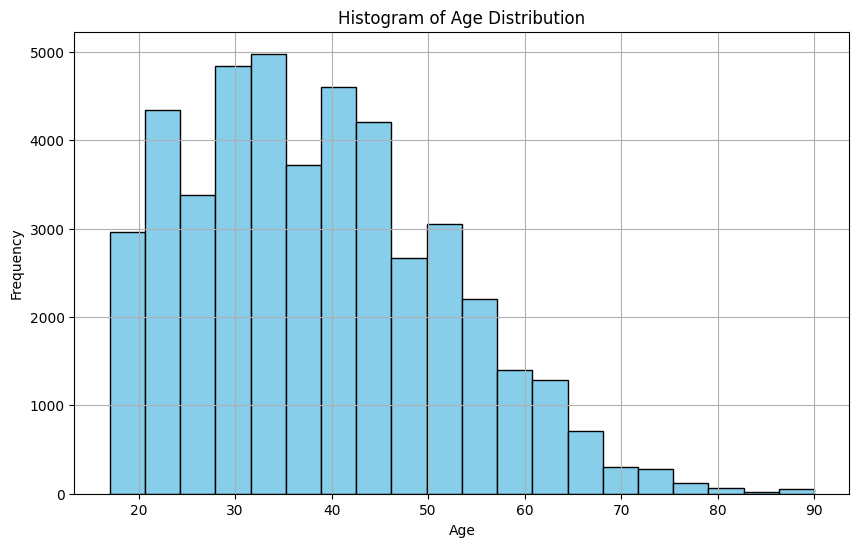

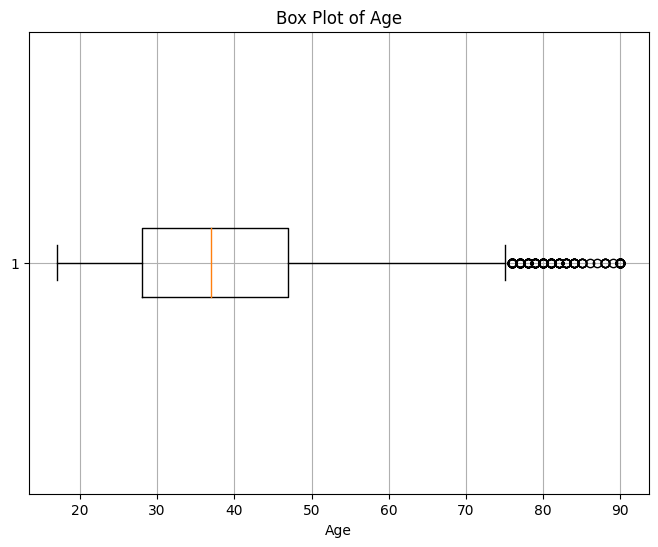

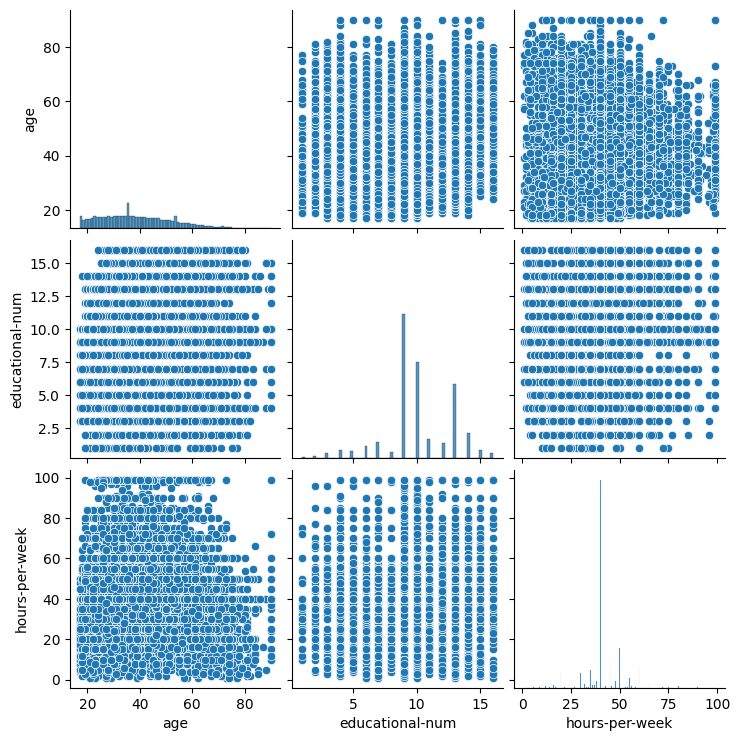

In [5]:
# Visualize the dataset using scatter plots, histograms, box plots, and pair plots to understand the data distribution, identify outliers, and detect patterns.


# Scatter plot for Age vs Hours-per-week

# your code here:

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['hours-per-week'], alpha=0.5)
plt.title('Scatter Plot of Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.grid(True)

plt.show()




# Histogram for distribution of age distribution

# your code here:

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()



# Box plot for age to see outliers

# your code here:

plt.figure(figsize=(8, 6))
plt.boxplot(df['age'], vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)

plt.show()


# Pair plot for Age, education-num, and hours-per-week

# your code here:

sns.pairplot(df[['age', 'educational-num', 'hours-per-week']])
plt.show()




# Encode and Normalize dataset

In [6]:
# Use one-hot endcoding to convert categorical features into numerical format

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns) # used pandas get_dummies instead of sklearn OneHotEncoder
df_encoded

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
48838,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
48839,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
48840,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [24]:
# Use StandardScaler from sklearn.preprocessing to normalize the features.

# your code here:

# notice: only numeric features need to be scaled, and we leave the other features intact
scaler = StandardScaler()

# numerics
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[numeric_features]), columns=numeric_features)
df_numeric_scaled = df_numeric_scaled.reset_index(drop=True)

# non-numerics
df_non_numeric = df_encoded.drop(columns=numeric_features)
df_non_numeric = df_non_numeric.reset_index(drop=True)

df_scaled = pd.concat([df_non_numeric, df_numeric_scaled], axis=1)
df_scaled

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120
4,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,-0.873671,0.639611,0.737034,-0.146733,-0.21878,-0.244684
45218,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0.109857,-0.334735,-0.438122,-0.146733,-0.21878,-0.078120
45219,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1.471665,-0.358060,-0.438122,-0.146733,-0.21878,-0.078120
45220,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,-1.251951,0.111279,-0.438122,-0.146733,-0.21878,-1.743763


# Implement PCA from Scratch

In [29]:
# Start by ensuring all data is numeric and normalized.
# Subtract the mean to center the data, calculate the covariance matrix, find eigenvalues and eigenvectors, sort them, and project the data onto the principal components.
# This section will test your understanding of PCA's mathematical foundation.


# your code here:

# notice: It's better not to normalize one-hot encoded features, so I just normalized the numeric features as I noted before

def pca(X, n_components):
    # center the data
    X_centered = X - np.mean(X, axis=0)
    
    # calculate covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)
    
    # find eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # sort eigenvalues and eigenvectors
    idx = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # project on components
    components = eigenvectors[:, :n_components]
    projected_data = np.dot(X_centered, components)
    
    return projected_data, components, eigenvalues


n = 2
X = df_scaled.values
projected_data, components, eigenvalues = pca(X, n)
print(projected_data)
print(projected_data.shape)


[[ 1.64538519  0.09173345]
 [-0.42981581  0.93029399]
 [-0.52156479 -0.78807966]
 ...
 [ 0.11996605  1.14072159]
 [ 2.13631424 -0.49642801]
 [-1.00936979  0.27012786]]
(45222, 2)


# Visualize the PCA-reduced data

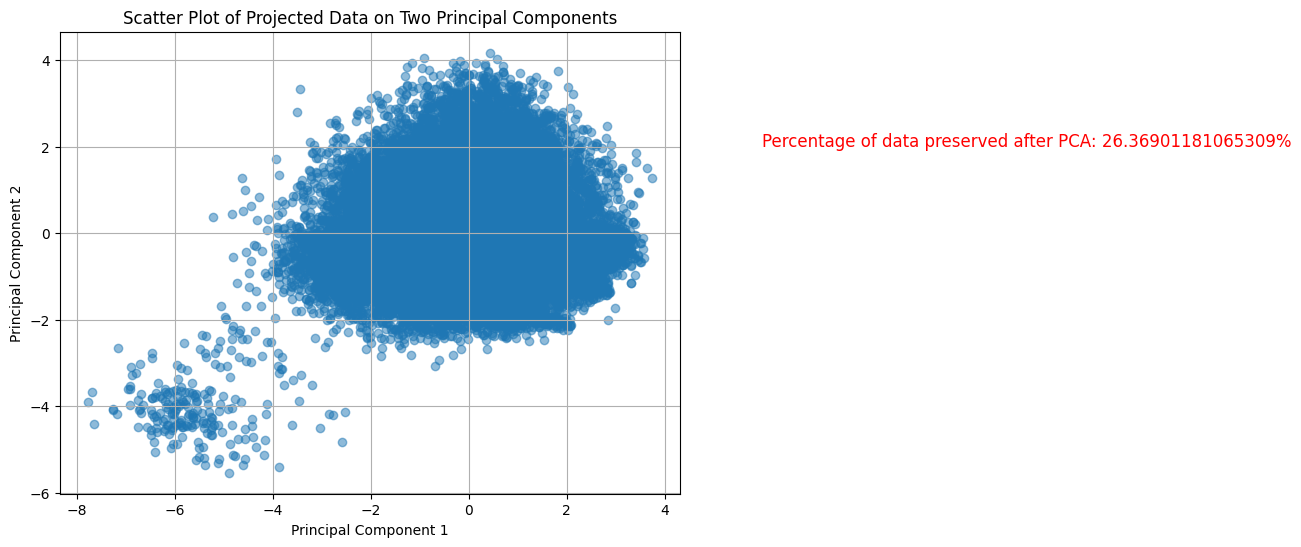

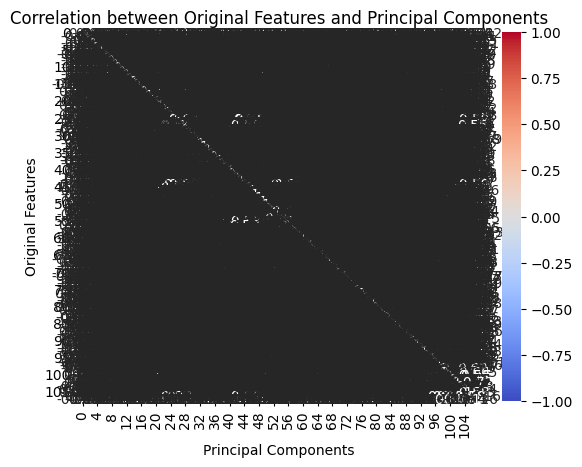

In [44]:

# Scatter Plot for 2D PCA Data (choose 2 pricipal components)

# your code here:

# calculate the percentage of data preserved after pca with two components
preserved_percentage = np.sum(eigenvalues[0:2]) / np.sum(eigenvalues) * 100

plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)
plt.title('Scatter Plot of Projected Data on Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.text(6, 2, f'Percentage of data preserved after PCA: {preserved_percentage}%', fontsize=12, color='red')
plt.show()




# Heatmap for Principal Component Correlation
# This requires calculating the correlation matrix between the original data and the PCA-transformed data.

correlation_matrix = np.corrcoef(X.T, projected_data.T)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()
